# **Results**

### Basic setup:

In [37]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_vfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_3860/3058285309.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [96]:
model = model_bufferstock()

In [97]:
sol = model.sol
par = model.par
aux = model.aux

model.setup()
model.allocate()
model.create_grids()

In [289]:
par.T = 5
par.N = 25              # Number of points in grids
par.w_old_max = 3.0     # Maximum cash on hand
par.d_old_max = 0.74    # Maximum total debt
par.rho = 3

model.solve()

T ===========  4


c:\Users\peter\OneDrive\Skole\Semester 8\Dyn Prog\BufferStock\model_vfi.py:170: RuntimeWarning: divide by zero encountered in power
  


T ===========  3
T ===========  2
T ===========  1
T ===========  0


In [98]:
model.solve()

T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


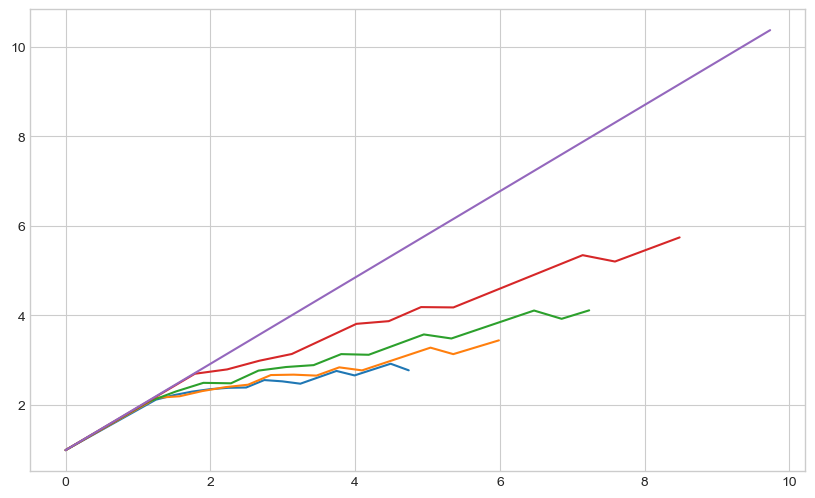

In [99]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.c[t,5,:,1])

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


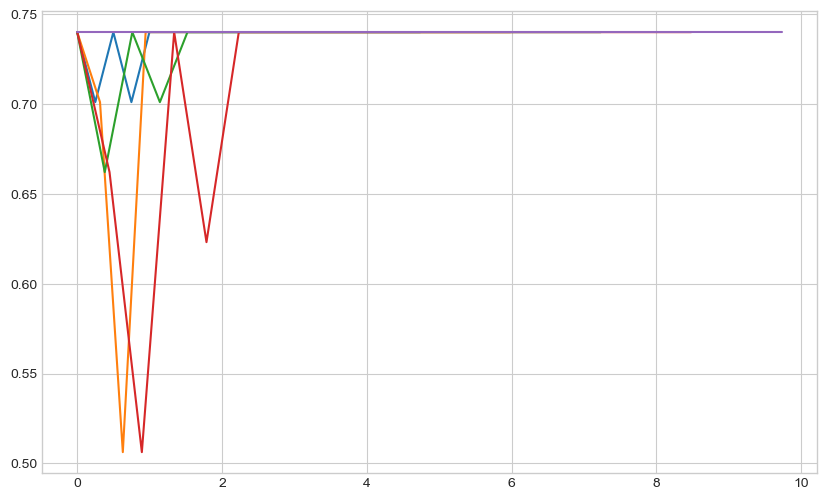

In [100]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.d[t,5,:,0])

plt.legend()
plt.show()

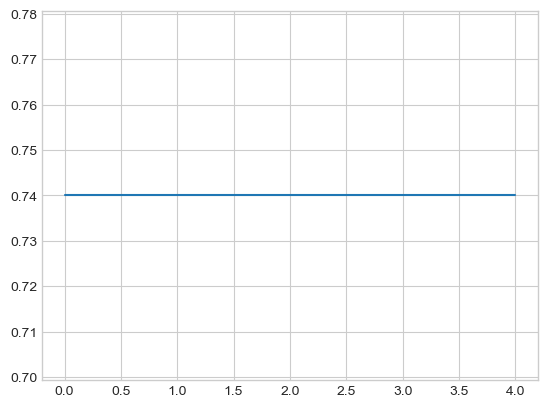

In [103]:
plt.plot(np.linspace(0,par.T-1,5),sol.d[:,10,10,0])

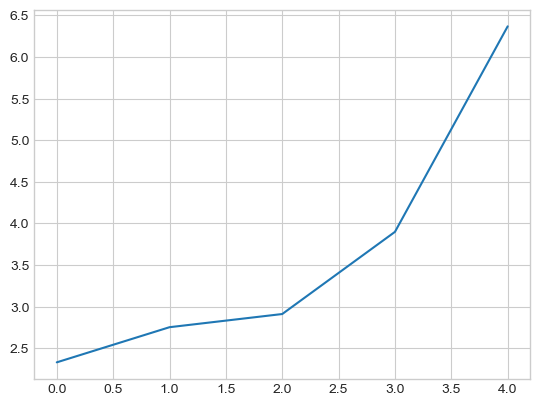

In [104]:
plt.plot(np.linspace(0,par.T-1,5),sol.c[:,10,10,0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


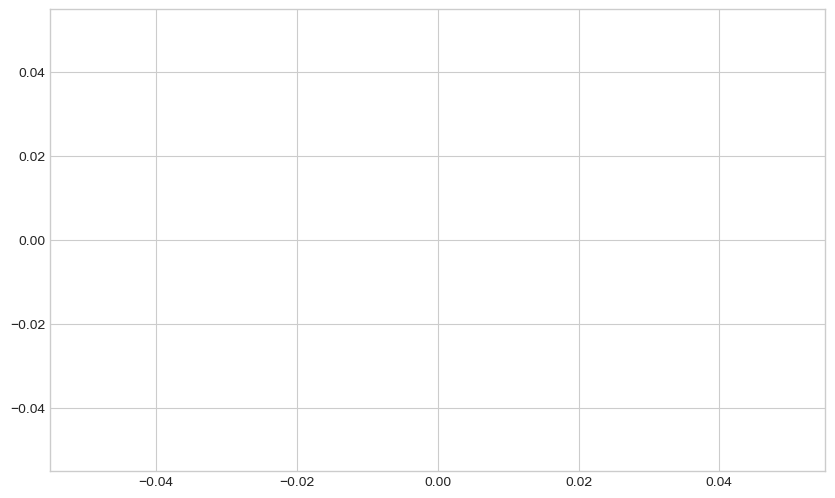

In [53]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.v[t,5,:,0])

plt.legend()
plt.show()

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

netto_assets = False

fig = plt.figure(figsize=(10, 6))

sol.grid_n = np.zeros((par.T, par.N))


def update_plot(t):
    # Create a figure and a 3D subplot

    sol.grid_n[t,:] = np.zeros(par.N)
    sol.grid_n[t,:] = sol.grid_w_old[t,:] - 0.74

    if netto_assets == True:
        x_axis = sol.grid_n[t,:]
        x_label_name = "n"

    else:
        x_axis = sol.grid_w_old[t,:]
        x_label_name = "w_old"
     


    fig = plt.figure(figsize=(20, 7))
    ax1 = fig.add_subplot(131, projection='3d')

    # Create grid coordinates from x and y
    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    # Plot the surface
    ax1.plot_surface(w_old, d_old, sol.c[t, :, :], cmap='viridis')

    # Invert the x-axis
    ax1.set_xlim(ax1.get_xlim()[::-1])
    ax1.set_ylim(ax1.get_ylim()[::-1])

    # Set labels and title
    ax1.set_xlabel(x_label_name)
    ax1.set_ylabel('d_old')
    ax1.set_zlabel('c')
    ax1.set_title('Consumption')



    ax2 = fig.add_subplot(132, projection='3d')

    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    ax2.plot_surface(w_old, d_old, sol.v[t, :, :], cmap='viridis')

    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_ylim(ax2.get_ylim()[::-1])

    ax2.set_xlabel(x_label_name)
    ax2.set_ylabel('d_old')
    ax2.set_zlabel('v')
    ax2.set_title('Utility')



    ax3 = fig.add_subplot(133, projection='3d')

    w_old, d_old = np.meshgrid(sol.grid_n[t,:], sol.grid_d_old[t, :])

    ax3.plot_surface(w_old, d_old, sol.d[t, :, :], cmap='viridis')

    # ax3.set_xlim(ax3.get_xlim()[::-1])
    # ax3.set_ylim(ax3.get_ylim()[::-1])

    ax3.set_xlabel(x_label_name)
    ax3.set_ylabel('d_old')
    ax3.set_zlabel('d')
    ax3.set_title('Debt')

    plt.subplots_adjust(wspace=0.2)


    plt.show()

# Create the interactive slider
interact(update_plot, t=(1, par.T-1, 1))

<Figure size 1000x600 with 0 Axes>

interactive(children=(IntSlider(value=2, description='t', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.update_plot(t)>

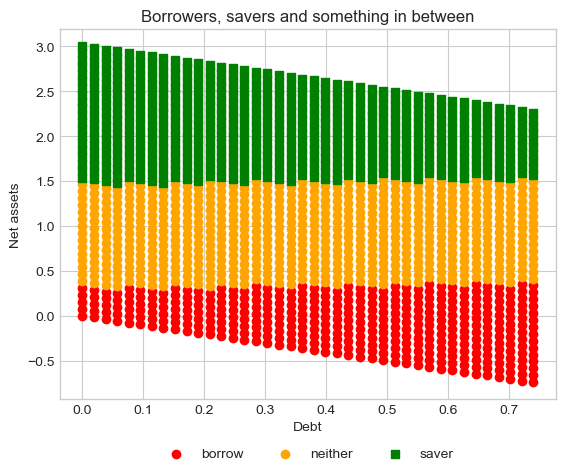

In [294]:
import pandas as pd
import matplotlib.pyplot as plt

t = 3

# Your data here
x = sol.grid_d_old[t,:]
y = sol.grid_w_old[t,:]
z = sol.d[t,:,:]

z.flatten()

x_new = []
y_new = []
z_new = []

for i in range(len(x)):
    for j in range(len(y)):
        x_new.append(x[i])
        y_new.append(y[j])
        if z[i,j] > 0.73:
            z_new.append("borrow")
        elif  0.04 < z[i,j] < 0.73:
            z_new.append("neither")
        else:
            z_new.append("saver")

df = pd.DataFrame({
    'x': x_new,
    'y': y_new,
    'category': z_new
})

df['net_assets'] = df['y'] - df['x']


# Define colors and markers for each category
colors = {'borrow': 'red', 'neither': 'orange', 'saver': 'green'}
markers = {'borrow': 'o', 'neither': 'o', 'saver': 's'}

# Plot scatter plot with grouped legend
for category, group in df.groupby('category'):
    plt.scatter(group['x'], group['net_assets'], color=colors[category], marker=markers[category], label=category)

# Add legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Add labels and title
plt.xlabel('Debt')
plt.ylabel('Net assets')
plt.title('Borrowers, savers and something in between')

# Show the plot
plt.show()



In [300]:
sim.w_old[t,:]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [298]:
t = 0


par.simN = 10
par.w_ini = 0
par.d_ini = 0

shape = (par.T, par.simN)

sim.d = np.nan +np.zeros(shape)
sim.c = np.nan +np.zeros(shape)

sim.w_old = par.w_ini + np.zeros(shape)
sim.d_old = par.d_ini + np.zeros(shape)


print(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:], sim.d_old[t,:], sim.w_old[t,:]))
print(np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:], sim.d_old[t,:], sim.w_old[t,:]), a_min = 0, a_max=0.74))


array([2.35384615, 2.35384615, 2.35384615, 2.35384615, 2.35384615,
       2.35384615, 2.35384615, 2.35384615, 2.35384615, 2.35384615])

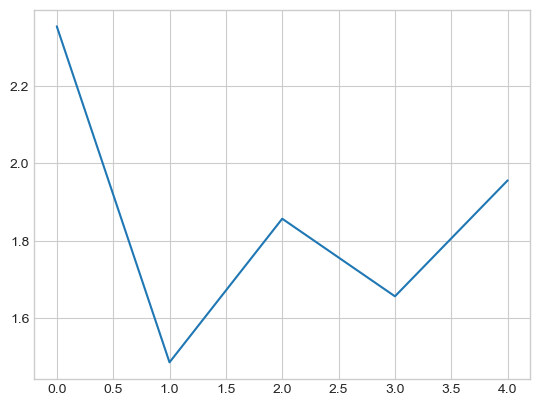

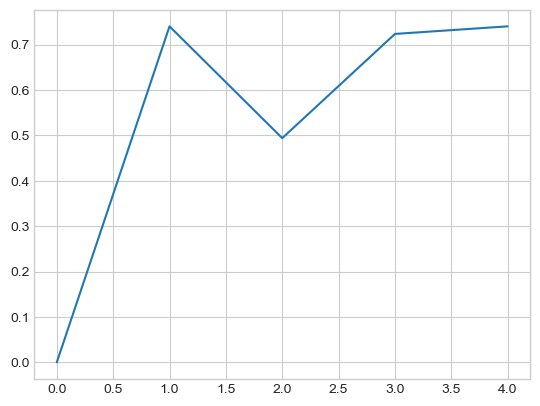

In [313]:
import tools
from numpy import random

class sim: pass

np.random.seed(1234)

par.simN = 10000
par.w_ini = 2
par.d_ini = 0

shape = (par.T, par.simN)

sim.d = np.nan +np.zeros(shape)
sim.c = np.nan +np.zeros(shape)

sim.w_old = par.w_ini + np.zeros(shape)
sim.d_old = par.d_ini + np.zeros(shape)

par.Nshocks = par.w.size
shocki = np.random.choice(par.Nshocks,(shape),replace=True,p=par.w) #draw values between 0 and Nshocks-1, with probability w
sim.psi = par.psi_vec[shocki] #Draw shocks from quadrature points
sim.xi = par.xi_vec[shocki] #Draw shocks from quadrature points


for t in range(par.T):

    sim.c[t,:] = tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:], sim.d_old[t,:], sim.w_old[t,:])
    sim.d[t,:] = np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:], sim.d_old[t,:], sim.w_old[t,:]), a_min = 0, a_max=0.74)

    if t < par.T-1:


        credit_con = random.randint(100)

        if credit_con <= 0.05:
            sim.d_old[t+1,:] = np.minimum((1-par.lambdaa)*sim.d_old[t,:], sim.d[t,:])

            interest = par.r_d * sim.w_old[t,:]
            installment = par.lambdaa * sim.w_old[t,:]
            remaining_debt = (1-par.lambdaa)*sim.w_old[t,:] 
            m = (1 + par.r_w)*sim.w_old[t,:] - installment - interest - remaining_debt + sim.d[t,:] + par.Gamma
            
            w_c = m - sim.c[t,:]

            sim.w_old[t+1,:] = (1 + par.r_w)*w_c - sim.d_old[t+1,:]*(par.r_d + par.lambdaa) + par.Gamma*sim.psi[t]*sim.xi[t]

        else:
            sim.d_old[t+1,:] = sim.d[t,:] 
            
            interest = par.r_d * sim.w_old[t,:]
            installment = par.lambdaa * sim.w_old[t,:]
            remaining_debt = (1-par.lambdaa)*sim.w_old[t,:] 
            m = (1 + par.r_w)*sim.w_old[t,:] - installment - interest - remaining_debt + sim.d[t,:] + par.Gamma
            
            w_c = m - sim.c[t,:]

            sim.w_old[t+1,:] = (1 + par.r_w)*w_c - sim.d_old[t+1,:]*(par.r_d + par.lambdaa) + par.Gamma*sim.psi[t]*sim.xi[t]


mean_c = np.mean(sim.c, axis=1)
mean_d = np.mean(sim.d, axis=1)        

plt.plot(mean_c)

plt.show()

plt.plot(mean_d)

plt.show()

In [ ]:
sol.grid_d_old[t,:]

array([0.        , 0.01897436, 0.03794872, 0.05692308, 0.07589744,
       0.09487179, 0.11384615, 0.13282051, 0.15179487, 0.17076923,
       0.18974359, 0.20871795, 0.22769231, 0.24666667, 0.26564103,
       0.28461538, 0.30358974, 0.3225641 , 0.34153846, 0.36051282,
       0.37948718, 0.39846154, 0.4174359 , 0.43641026, 0.45538462,
       0.47435897, 0.49333333, 0.51230769, 0.53128205, 0.55025641,
       0.56923077, 0.58820513, 0.60717949, 0.62615385, 0.64512821,
       0.66410256, 0.68307692, 0.70205128, 0.72102564, 0.74      ])